The polynomial approach show a rate of $\left(1-O(\frac{1}{\sqrt{k}})\right)^t\cdot t$ but they are not tight 

Here I troubleshooted the recurrence coefficients

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from optim import *

from utils import *
import scipy
from sklearn.linear_model import LinearRegression

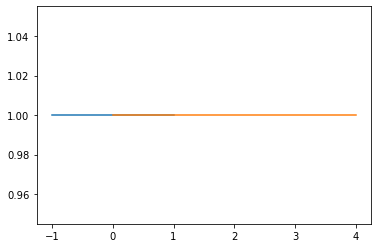

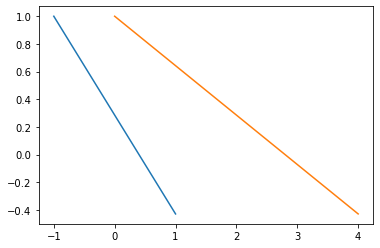

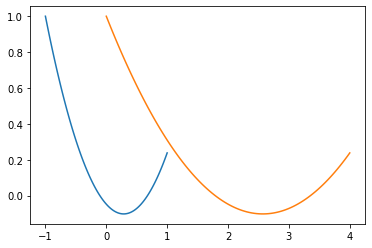

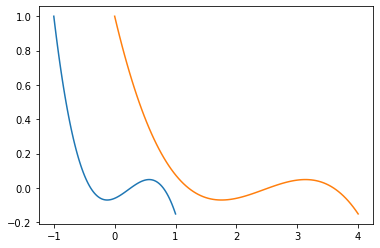

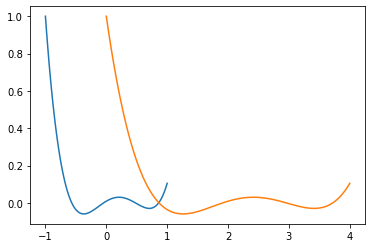

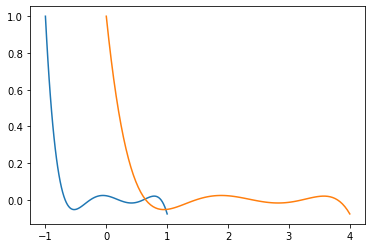

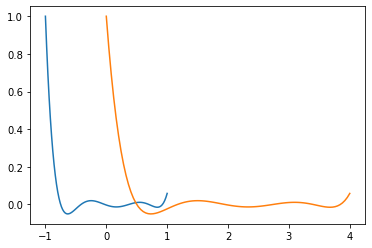

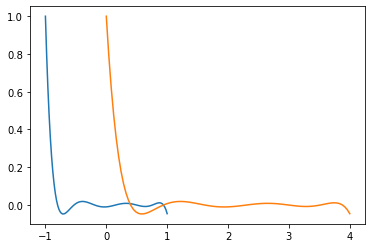

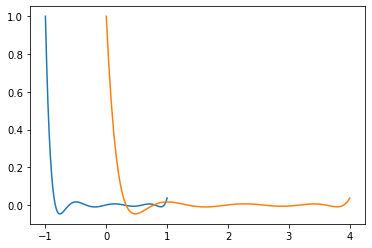

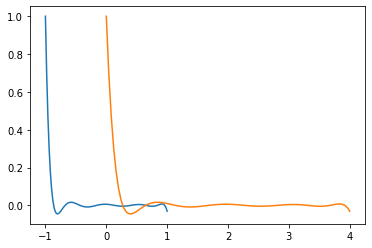

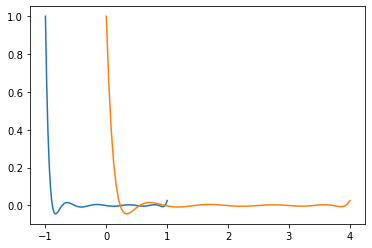

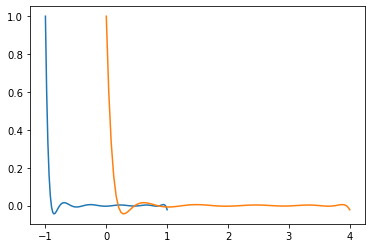

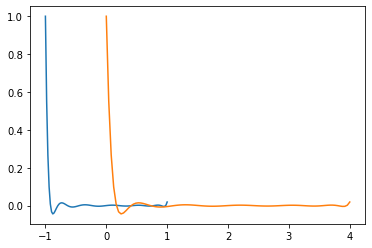

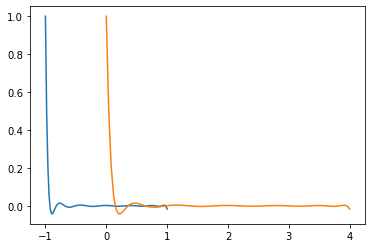

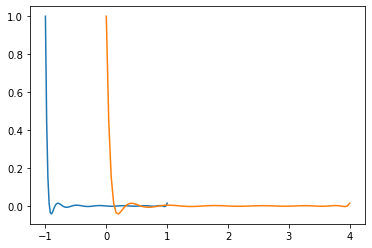

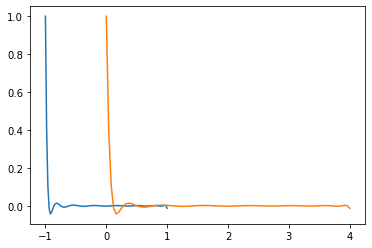

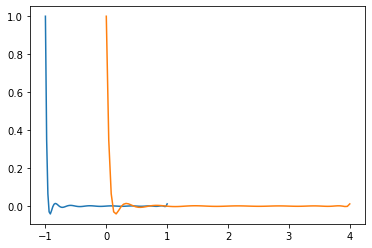

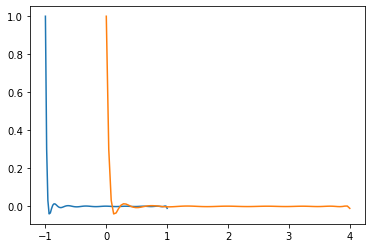

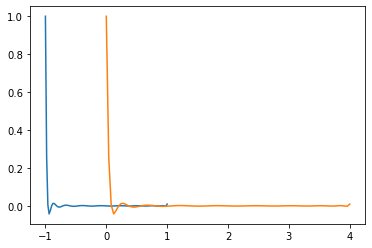

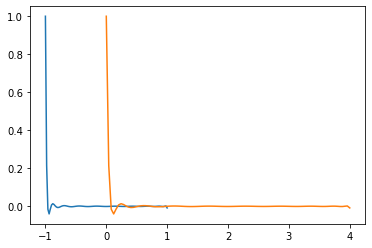

In [27]:
a,b=1/2,5/2
L=4
gen=residual_wrapgen(shift_wrapgen(jacobi_basegen(a,b),a=2/L,b=-1))
p1,p=np.poly1d([0]),np.poly1d(1)
x=np.poly1d([1,0])
t0=np.linspace(-1,1,100)
t1=np.linspace(0,4,100)
for i in range(20):
    
    
    psp=scipy.special.jacobi(i,a,b)
    plt.plot(t0,psp(t0)/psp(-1))
    plt.plot(t1,p(t1))
    plt.show()
    alpha,beta,gamma=next(gen)
    aux=p
    p=(alpha+x*beta)*p+gamma*p1
    p1=aux



In [21]:
a,b=1/2,5/2
gen=residual_wrapgen(jacobi_basegen(a,b))
p1,p=np.poly1d([0]),np.poly1d(1)
x=np.poly1d([1,0])

for i in range(20):
    print(p)
    psp=scipy.special.jacobi(i,a,b)
    print(psp/psp[0],'\n\n')
    
    alpha,beta,gamma=next(gen)
    aux=p
    p=(alpha+x*beta)*p+gamma*p1
    p1=aux



 
1
 
1 


 
-2.5 x + 1
 
-2.5 x + 1 


     2
-14 x + 8 x + 1
     2
-14 x + 8 x + 1 


    3     2
12 x - 8 x - 2.5 x + 1
    3     2
12 x - 8 x - 2.5 x + 1 


       4         3         2
97.78 x - 71.11 x - 37.33 x + 21.33 x + 1
       4         3         2
97.78 x - 71.11 x - 37.33 x + 21.33 x + 1 


     5      4      3      2
-52 x + 40 x + 30 x - 20 x - 2.5 x + 1
     5      4      3      2
-52 x + 40 x + 30 x - 20 x - 2.5 x + 1 


      6       5       4       3      2
-560 x + 448 x + 440 x - 320 x - 70 x + 40 x + 1
      6       5       4       3      2
-560 x + 448 x + 440 x - 320 x - 70 x + 40 x + 1 


       7         6         5       4      3      2
217.6 x - 179.2 x - 218.4 x + 168 x + 54 x - 36 x - 2.5 x + 1
       7         6         5       4      3      2
217.6 x - 179.2 x - 218.4 x + 168 x + 54 x - 36 x - 2.5 x + 1 


      8        7        6        5        4       3       2
2918 x - 2458 x - 3584 x + 2867 x + 1232 x - 896 x - 112 x + 64 x + 1
      8        7  

In [8]:
import orthopy
a,b=0,0
rc = orthopy.c1.jacobi.RecurrenceCoefficients(
    "classical",  # or "classical", "normal"
    alpha=a, beta=b, symbolic=False
)
gen=jacobi_basegen(a,b)
for i in range(30):
    print(rc[i],next(gen))

(1.0, 0.0, nan) (0.0, 1.0, 0)
(1.5, 0.0, 0.5) (0.0, 1.5, -0.5)
(1.6666666666666667, 0.0, 0.6666666666666666) (0.0, 1.6666666666666667, -0.6666666666666666)
(1.75, 0.0, 0.75) (0.0, 1.75, -0.75)
(1.8, 0.0, 0.8) (0.0, 1.8, -0.8)
(1.8333333333333333, 0.0, 0.8333333333333334) (0.0, 1.8333333333333333, -0.8333333333333334)
(1.8571428571428572, 0.0, 0.8571428571428571) (0.0, 1.8571428571428572, -0.8571428571428571)
(1.875, 0.0, 0.875) (0.0, 1.875, -0.875)
(1.8888888888888888, 0.0, 0.8888888888888888) (0.0, 1.8888888888888888, -0.8888888888888888)
(1.9, 0.0, 0.9) (0.0, 1.9, -0.9)
(1.9090909090909092, 0.0, 0.9090909090909091) (0.0, 1.9090909090909092, -0.9090909090909091)
(1.9166666666666667, 0.0, 0.9166666666666666) (0.0, 1.9166666666666667, -0.9166666666666666)
(1.9230769230769231, 0.0, 0.9230769230769231) (0.0, 1.9230769230769231, -0.9230769230769231)
(1.9285714285714286, 0.0, 0.9285714285714286) (0.0, 1.9285714285714286, -0.9285714285714286)
(1.9333333333333333, 0.0, 0.9333333333333333) (0.

In [87]:
niter=1500
metric='f'
theo_coeff=3/2

coefs=[]
#log,_=jacobi_moment(f,beta=3/2,niter=niter)
for xi in np.linspace(-1,1,10):
    logs=[]
    for _ in range(4):c
        f=RandomQuadratic(n=1500)
        log,_=gd(f,niter=niter)
        logs.append(log[metric])

    logs=np.asarray(logs)
    m,s=logs.mean(0),logs.std(0)


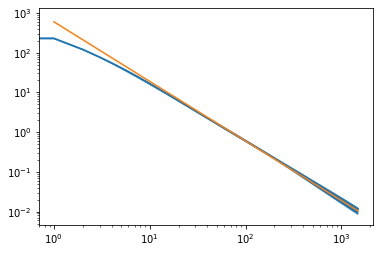

In [88]:

plt.plot(log[metric])
plt.plot(np.array([1,niter]),np.array([m[-1]*(niter**theo_coeff),m[-1]]))
plt.fill_between(np.arange(niter+1),m-s,m+s)
plt.xscale('log')
plt.yscale('log')